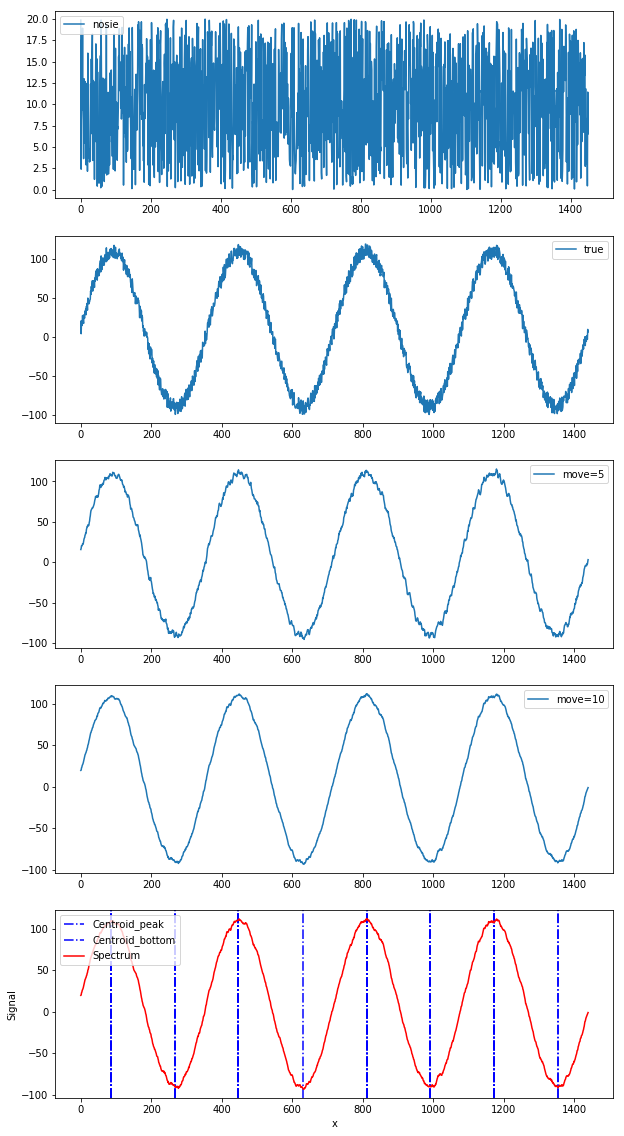

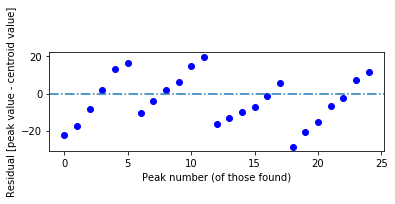

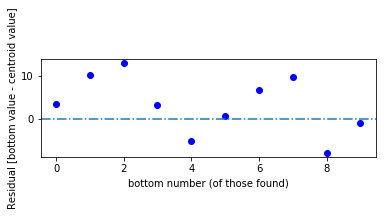

In [383]:
1.#生成sin函数四周期以上
#a = 100 周期=16
#请生成噪声 强度是20
#显示画出生成的结果

2.#去除噪声
#滑动的平滑   -2 21 0 1 2 将五个点对应的值除以5得到平均

3.#搜索所有的极值

import numpy as np 
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

x = np.linspace(0,360*4,1450)
y = 100*np.sin(x*np.pi/180)
noise = 20*np.random.rand(x.size)
y1 = noise + y
fig, ax =plt.subplots(5,1,figsize=(10,20))
ax[0].plot(noise,label='nosie')
ax[0].legend()

#生成真实的信号
ax[1].plot(x,y1,label='true')
ax[1].legend()

# 五个取平均做平滑
ny1=[]
for i in range(len(y1)):
    b = y1[i:i+5]
    if len(b)==5:
        ny1.append(y1[i:i+5].mean())
x2= np.linspace(0,360*4,1446)
ax[2].plot(x2,ny1,label='move=5')
ax[2].legend()

# 十个取平均做平滑
ny2=[]
for i in range(len(y1)):           
    a = y1[i:i+11]
    if len(a)==11:
        ny2.append(a.mean()) 
x3 = np.linspace(0,360*4,1440)
ax[3].plot(x3,ny2,label='move=10')
ax[3].legend()

#搜索十个作为滑动的极值
threshhold1 = 96
peaks = [] 
for i in range(len(ny2)-1):
    if (ny2[i] > ny2[i+1]) and (ny2[i]>ny2[i-1]) and (ny2[i]>threshhold):
        if (ny2[i] > ny2[i-2]) and (ny2[i] > ny2[i+2]):
                peaks.append(i)

threshhold2=-90
bottoms=[]
for i in range(len(ny2)-1):
    if (ny2[i] < ny2[i+1]) and (ny2[i] < ny2[i-1]) and (ny2[i] <threshhold2):
        if (ny2[i] < ny2[i-2]) and (ny2[i] < ny2[i+2]):
            bottoms.append(i)
            

# p, _ = find_peaks(ny2,height=100)
# ax[4].plot(ny2)
# for i in p:
#     ax[4].plot(i,ny2[i],'x')

centroids_peaks = []
for i in peaks:
    #Calculate how far backward and forward to go:
    half_max = ny2[i] / 2.
    xmin = (np.where(ny2[i::-1] < half_max)[0])[0]
    xmax = (np.where(ny2[i:] < half_max)[0])[0]
    x_range = x3[i-xmin:i+xmax]
    I_range = ny2[i-xmin:i+xmax]
    x_range = np.array(x_range)
    I_range = np.array(I_range)
    xcm1 = np.sum((x_range*I_range)) / np.sum(I_range)
    centroids_peaks.append(xcm1)
    
centroids_bottoms = []
for i in bottoms:
    halfmin = ny2[i] / 2.
    xminn = (np.where(ny2[i::-1] > halfmin)[0])[0]
    xmaxx = (np.where(ny2[i:] > halfmin)[0])[0]
    xrange = x3[i-xminn:i+xmaxx]
    Irange = ny2[i-xminn:i+xmaxx]
    xrange = np.array(xrange)
    Irange = np.array(Irange)
    xcm2 = np.sum((xrange*Irange)) / np.sum(Irange)
    centroids_bottoms.append(xcm2)

def plot_vert(x):     
    plt.axvline(x, color='blue', ls='-.')
    
for i in centroids_peaks[1:]:
    plot_vert(i)
for j in centroids_bottoms[1:]:
    plot_vert(j)
        
#Reserve the first so I don't have a million "centroid" labels
plt.axvline(centroids_peaks[0],color='blue',ls='-.',label='Centroid_peak')#Plot the actual spectrum
plt.axvline(centroids_bottoms[0],color='blue',ls='-.',label='Centroid_bottom')
plt.plot(x3,ny2, 'r',label='Spectrum')
plt.xlabel('x')
plt.ylabel('Signal')
plt.legend(loc=2)
plt.show()

plt.subplot(2,1,1)
residual = np.array(peaks) - np.array(centroids_peaks)
plt.plot(np.arange(len(residual)),residual,'bo')
plt.xlabel('Peak number (of those found)')
plt.ylabel('Residual [peak value - centroid value]')
plt.axhline(0,ls='-.')
plt.show()

plt.subplot(2,1,2)
residual = np.array(bottoms) - np.array(centroids_bottoms)
plt.plot(np.arange(len(residual)),residual,'bo')
plt.xlabel('bottom number (of those found)')
plt.ylabel('Residual [bottom value - centroid value]')
plt.axhline(0,ls='-.')
plt.show()





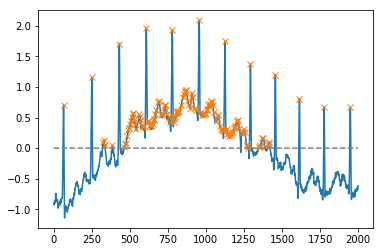

In [376]:
import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
import numpy as np
x = electrocardiogram()[2000:4000]
peaks, _ = find_peaks(x, height=0)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()


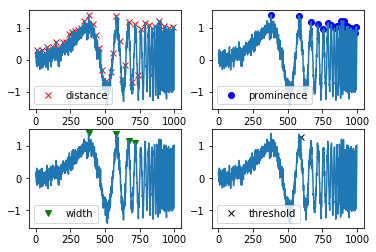

In [330]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

x = np.sin(2*np.pi*(2**np.linspace(2,10,1000))*np.arange(1000)/48000) + np.random.normal(0, 1, 1000) * 0.15
peaks, _ = find_peaks(x, distance=20)
peaks2, _ = find_peaks(x, prominence=1)      # BEST!
peaks3, _ = find_peaks(x, width=20)
peaks4, _ = find_peaks(x, threshold=0.4)     # Required vertical distance to its direct neighbouring samples, pretty useless
plt.subplot(2, 2, 1)
plt.plot(peaks, x[peaks],"xr"); plt.plot(x); plt.legend(['distance'])
plt.subplot(2, 2, 2)
plt.plot(peaks2, x[peaks2],"ob"); plt.plot(x); plt.legend(['prominence'])
plt.subplot(2, 2, 3)
plt.plot(peaks3, x[peaks3],"vg"); plt.plot(x); plt.legend(['width'])
plt.subplot(2, 2, 4)
plt.plot(peaks4, x[peaks4],"xk"); plt.plot(x); plt.legend(['threshold'])
plt.show()


np.where(condition)
只有条件 (condition)，没有x和y，则输出满足条件 (即非0) 元素的坐标 。这里的坐标以tuple的形式给出，通常原数组有多少维，输出的tuple中就包含几个数组，分别对应符合条件元素的各维坐标。